<h3>Algoritmo Genético para sintonización de un controlador PD</h3>


    Aplicación de Algoritmos Genéticos para Sintonización de un Controlador PD 
 

Un controlador PD (proporcional-diferencial) es un elemento de transferencia de un sistema de control de bucle cerrado que comprende componentes de elemento tanto P como D. El componente diferencial responde a la velocidad en la que el error de control cambia. El valor es multiplicado por el coeficiente de acción-derivada KD y sumado al componente P (lo que, por su parte, actúa proporcionalmente en un error de control específico). Como resultado, el controlador PD puede responder a un error de control inminente y, por lo tanto, lograr una acción derivada durante el proceso de control.

El controlador PD es un controlador rápido y puede incluso corregir bucles de control con doble integración. Sin embargo, al igual que el controlador P, no puede corregir completamente un error de control. <br>
La ecuación del controlador es   **y(t)=KP⋅e(t)+KDde(t)dt**



In [14]:
# Librerías requeridas

from matplotlib import pyplot as plt
import numpy as np
import random

In [15]:
"""
Función que muestra la respuesta de un controlador PD en un arreglo 
Kp : Constante de proporcionalidad
Kd : Constante diferencial
ad : Valor final al que quiero llegar en una entrada escalón
a0:  Valor inicial del controlador 
t :  Ventana de tiempo
"""

def respuesta(kp, kd, ad, a0, t):
    a = np.zeros(t.size)
    for i in range(t.size):
        if i < 2:
            a[i] = a0
        else:
            dt = t[i]-t[i-1]
            a[i] = (kp*dt**2*ad+a[i-1]*(2+kd*dt)-a[i-2])/(1+kp*dt**2+kd*dt)
    return a

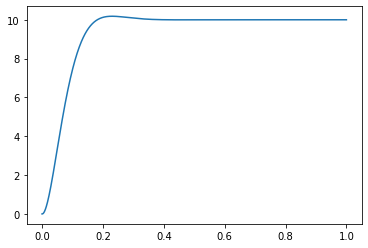

In [16]:
# Ejemplo de uso de la función respuesta
ad = 10    # altura de destino
a0 = 0     # altura inicial
kp = 500   # constante proporcional
kd = 35    # constante diferencial
t = np.linspace(0,1,1000)
# Generaamos vector de respuesta
a = respuesta(kp, kd, ad, a0, t)
# Graficamos la curva de respuesta del controlador
plt.plot(t,a)
plt.show()

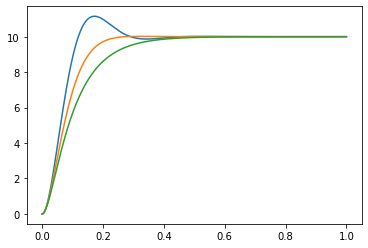

In [17]:
# Generamos tres respuestas con la función para comprobar que distintas combinaciones
# de valores de contante diferencial y proporcional nos generan respuestas distintas.
# 
a1 = respuesta(500, 25, ad, a0, t)
a2 = respuesta(500, 40, ad, a0, t)
a3 = respuesta(500, 55, ad, a0, t)

plt.plot(t,a1)
plt.plot(t,a2)
plt.plot(t,a3)
plt.show()

# ¿Cuál es la respuesta ideal?
# Si queremos obtener una respuesta críticamente amortiguada. Que no se sobrepasa ni ahacia arriba o que quede por abajo del
# valor ideal.


In [18]:
"""
Función para crear individuos que tienen dos números:
     la constante proporcional y la constante diferencial del controlador
"""
def individuo(min, max):
    return[random.randint(min, max) for i in range(largo)]

In [19]:
"""
Función para crear población donde cada individuo tendrá las dos constantes kp y kd
con valores entre 1 y 1000
"""
def crearPoblacion(num):
    return [individuo(1,1000) for i in range(num)]

In [20]:
"""

Función de fitness para calcular la diferencia de la señal de respuesta entre el valor de la altura deseada y el valor de
la altura alcanzada:
             fitness = -abs(max(a)-ad)
Le colocamos el signo negativo porque intentamos minimizar la diferencia              
"""

def calcularFitness(individuo):
    fitness = 0
    for i in range(len(individuo)):
        # calcular fitness aquí!
        kp = individuo[0]
        kd = individuo[1]
        ad = objetivo[0]
        ai = 0
        t = np.linspace(0,1,100)
        a = respuesta(kp, kd, ad, ai, t)
        fitness = -abs(max(a)-ad)
    return fitness

In [21]:
def seleccion_y_reproduccion(poblacion, alcance):
    #Calcula el fitness de cada individuo, y lo guarda en pares ordenados de la forma (5 , [1,2,1,1,4,1,8,9,4,1])
    puntuados = [ (calcularFitness(i), i) for i in poblacion] 
    #Ordena los pares ordenados y se queda solo con el array de valores
    puntuados = [i[1] for i in sorted(puntuados)] 
    poblacion = puntuados
  
    #Esta linea selecciona los 'n' individuos del final
    seleccionados =  puntuados[(len(puntuados) - alcance):] 
  
    #Se mezcla el material genetico para crear nuevos individuos
    for i in range(len(poblacion)-alcance):
        #Se elige un punto para hacer el intercambio
        punto = random.randint(1,largo-1) 
        #Se eligen dos padres
        padre = random.sample(seleccionados, 2) 
        #Se mezcla el material genetico de los padres en cada nuevo individuo
        poblacion[i][:punto] = padre[0][:punto] 
        poblacion[i][punto:] = padre[1][punto:]
  
        # se retorna la nueva poblacion de individuos

    return poblacion 

In [22]:
def mutar(poblacion, probabilidad_de_mutacion, alcance):
    for i in range(len(poblacion) - alcance):
        #Cada individuo de la poblacion (menos los padres) tienen una probabilidad de mutar
        if random.random() <= probabilidad_de_mutacion:
            #Se elgie un punto al azar
            punto = random.randint(0,largo-1) 
            #y un nuevo valor para este punto
            nuevo_valor = random.randint(1,1000) 
  
            #Es importante mirar que el nuevo valor no sea igual al viejo
            while nuevo_valor == poblacion[i][punto]:
                nuevo_valor = random.randint(1,1000)
  
            #Se aplica la mutacion
            poblacion[i][punto] = nuevo_valor
  
    return poblacion

In [23]:
# Objetivo a alcanzar [valor final]
objetivo = [20] 
# La longitud del material genetico de cada individuo
largo = 2      
# La cantidad de individuos que habra en la poblacion
num = 20 
#Cuantos individuos se seleccionan para reproduccion. Necesariamente mayor que 2
alcance = 2     
#La probabilidad de que un individuo mute
probabilidad_de_mutacion = 0.3   

#Inicializar una poblacion
poblacion = crearPoblacion(num)
#Se muestra la poblacion inicial
print("Poblacion Inicial:\n%s"%(poblacion)) 

#Se evoluciona la poblacion en 100 evoluciones
for i in range(100):
    poblacion = seleccion_y_reproduccion(poblacion, alcance)
    poblacion = mutar(poblacion, probabilidad_de_mutacion, alcance)

#Se muestra la poblacion final    
print("Poblacion Final:\n%s"%(poblacion)) 

Poblacion Inicial:
[[499, 383], [567, 443], [632, 263], [483, 561], [354, 888], [113, 953], [857, 479], [401, 285], [175, 483], [37, 452], [160, 614], [834, 672], [846, 631], [641, 746], [445, 533], [983, 935], [28, 162], [517, 788], [193, 578], [306, 850]]
Poblacion Final:
[[966, 62], [9, 62], [966, 62], [966, 62], [966, 62], [966, 62], [966, 62], [966, 226], [966, 62], [966, 62], [966, 62], [966, 62], [966, 62], [966, 62], [966, 62], [966, 62], [966, 704], [966, 62], [966, 62], [966, 62]]


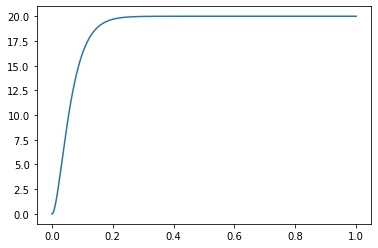

In [24]:
# verificamos la respuesta del controlador obtenido
ad = objetivo[0]
a0 = 0
# Seleccionamos el individuo que está en el tope de la lista, el últimob
seleccionado = poblacion[-1]
kp = seleccionado[0]
kd = seleccionado[1]
t = np.linspace(0,1,1000)
a = respuesta(kp, kd, ad, a0, t)
plt.plot(t,a)
plt.show()